# 🎧 Spotify Top-200 Charts (2020–2021) – Exploratory Data Analysis  
**Author:** Nandini Vyas  

**Objectives**
1. Clean the raw Spotify chart data (`spotify_dataset.csv`).  
2. Uncover trends in genres, popularity, and audio features.  
3. Produce visual insights suitable for a portfolio or blog.  


In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)


In [4]:
df = pd.read_csv("spotify_dataset.csv")   # make sure the CSV sits next to the notebook
df.shape, df.head()


((1556, 23),
    Index  Highest Charting Position  Number of Times Charted  \
 0      1                          1                        8   
 1      2                          2                        3   
 2      3                          1                       11   
 3      4                          3                        5   
 4      5                          5                        1   
 
   Week of Highest Charting                          Song Name     Streams  \
 0   2021-07-23--2021-07-30                            Beggin'  48,633,449   
 1   2021-07-23--2021-07-30          STAY (with Justin Bieber)  47,248,719   
 2   2021-06-25--2021-07-02                           good 4 u  40,162,559   
 3   2021-07-02--2021-07-09                         Bad Habits  37,799,456   
 4   2021-07-23--2021-07-30  INDUSTRY BABY (feat. Jack Harlow)  33,948,454   
 
            Artist Artist Followers                 Song ID  \
 0        Måneskin          3377762  3Wrjm47oTz2sjIgck11l5e   

In [5]:
df.info()
df.isna().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

Index            0
Popularity       0
Valence          0
Duration (ms)    0
Tempo            0
Liveness         0
Acousticness     0
Speechiness      0
Loudness         0
Energy           0
dtype: int64

In [6]:
# ▸ drop rows missing critical columns
df = df.dropna(subset=["Song Name", "Artist", "Popularity", "Genre"])

# ▸ standardise genre strings
df["Genre"] = df["Genre"].str.lower().str.strip()

# Convert 'Duration (ms)' to numeric
df["Duration (ms)"] = pd.to_numeric(df["Duration (ms)"], errors='coerce')

# Create new column for minutes
df["Duration_Min"] = df["Duration (ms)"] / 60000

# Drop rows where conversion failed
df.dropna(subset=["Duration_Min"], inplace=True)

# Convert 'Duration (ms)' to numeric
df["Duration (ms)"] = pd.to_numeric(df["Duration (ms)"], errors='coerce')

# Create new column for minutes
df["Duration_Min"] = df["Duration (ms)"] / 60000

# Drop rows where conversion failed
df.dropna(subset=["Duration_Min"], inplace=True)


# ▸ ensure numeric cols are numeric
num_cols = ["Popularity","Danceability","Energy",
            "Tempo","Valence","Loudness","Duration_Min"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

df.dropna(subset=num_cols, inplace=True)       # drop rows still containing NaNs
df.reset_index(drop=True, inplace=True)
print("After cleaning:", df.shape)


After cleaning: (1545, 24)


In [7]:
summary = df.describe()
summary


,Index,Highest Charting Position,Number of Times Charted,Popularity,Danceability,Energy,Loudness,Tempo,Duration (ms),Valence,Duration_Min
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,779.135922,87.825243,10.684142,70.089320,0.689997,0.633495,-6.348474,122.811023,197940.816828,0.514704,3.299014
std,449.593861,58.132046,16.389761,15.824034,0.142444,0.161577,2.509281,29.591088,47148.930420,0.227326,0.785816
min,1.000000,1.000000,1.000000,0.000000,0.150000,0.054000,-25.166000,46.718000,30133.000000,0.032000,0.502217
25%,389.000000,37.000000,1.000000,65.000000,0.599000,0.532000,-7.491000,97.960000,169266.000000,0.343000,2.821100
50%,780.000000,80.000000,4.000000,73.000000,0.707000,0.642000,-5.990000,122.012000,193591.000000,0.512000,3.226517
75%,1169.000000,137.000000,12.000000,80.000000,0.796000,0.752000,-4.711000,143.860000,218902.000000,0.691000,3.648367
max,1556.000000,200.000000,142.000000,100.000000,0.980000,0.970000,1.509000,205.272000,588139.000000,0.979000,9.802317


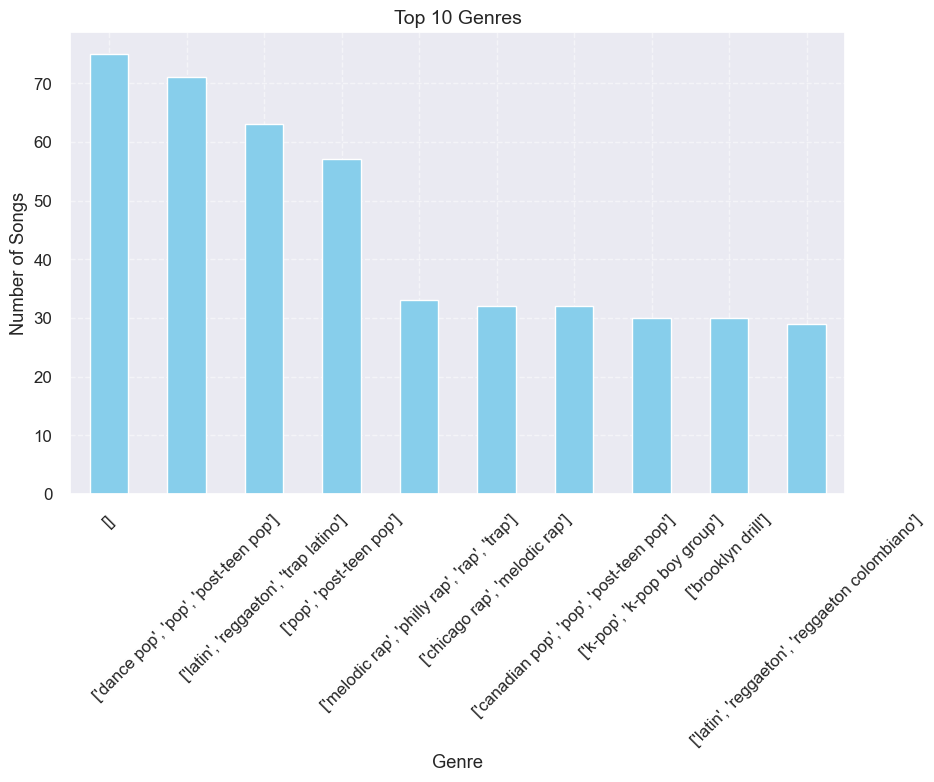

In [8]:
top_genres = df['Genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='skyblue')
plt.title("Top 10 Genres", fontsize=14)
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig("top_genres.png", dpi=300, bbox_inches='tight')
plt.show()



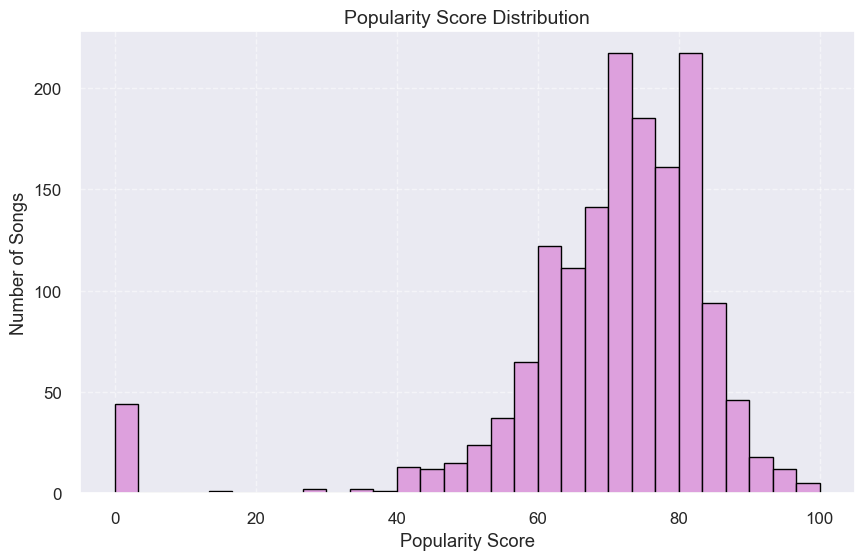

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df["Popularity"], bins=30, color='plum', edgecolor='black')
plt.title("Popularity Score Distribution", fontsize=14)
plt.xlabel("Popularity Score")
plt.ylabel("Number of Songs")
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig("Popularity_distribution.png", dpi=300, bbox_inches='tight')
plt.show()



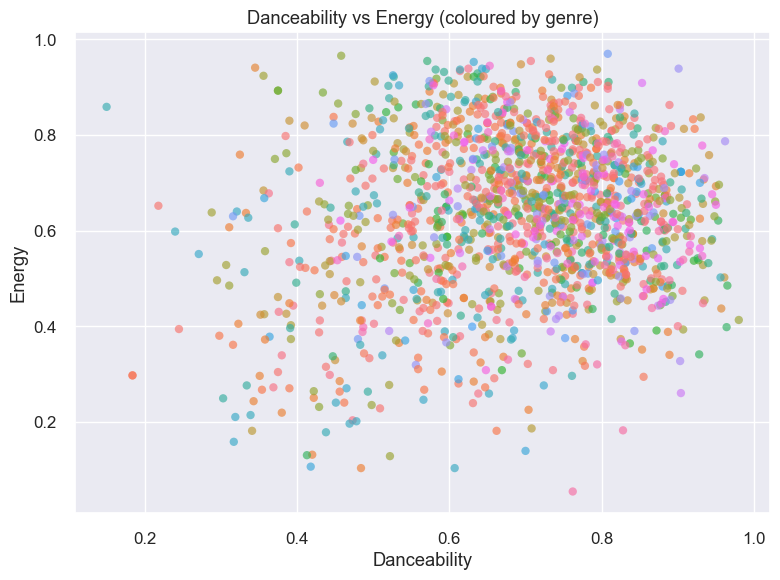

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Danceability", y="Energy",
                hue="Genre", alpha=0.65, edgecolor="none", legend=False)
plt.title("Danceability vs Energy (coloured by genre)")
plt.tight_layout(); plt.show()


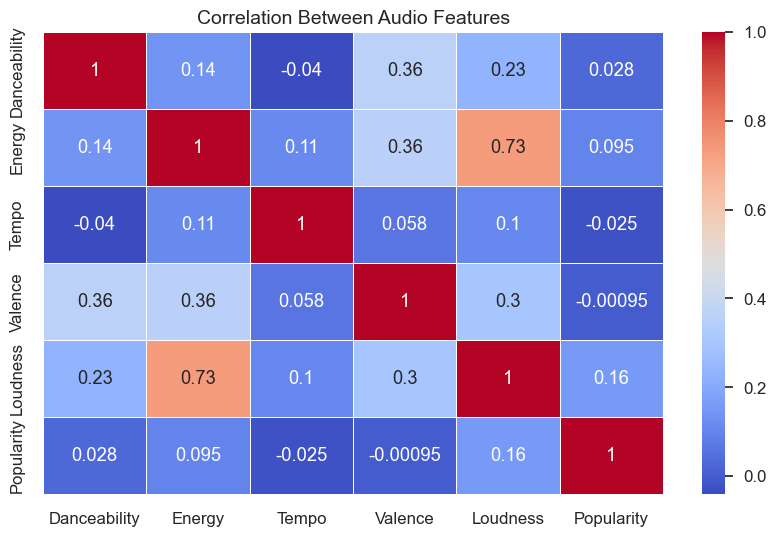

In [11]:
features = ["Danceability", "Energy", "Tempo", "Valence", "Loudness", "Popularity"]
corr = df[features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Audio Features", fontsize=14)

plt.savefig("Correlation_audio_features.png", dpi=300, bbox_inches='tight')
plt.show()



C:\Users\Nandini\AppData\Local\Temp\ipykernel_17444\3433623772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pop_by_genre.values, y=pop_by_genre.index, palette="rocket")
C:\Users\Nandini\AppData\Local\Temp\ipykernel_17444\3433623772.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(); plt.show()


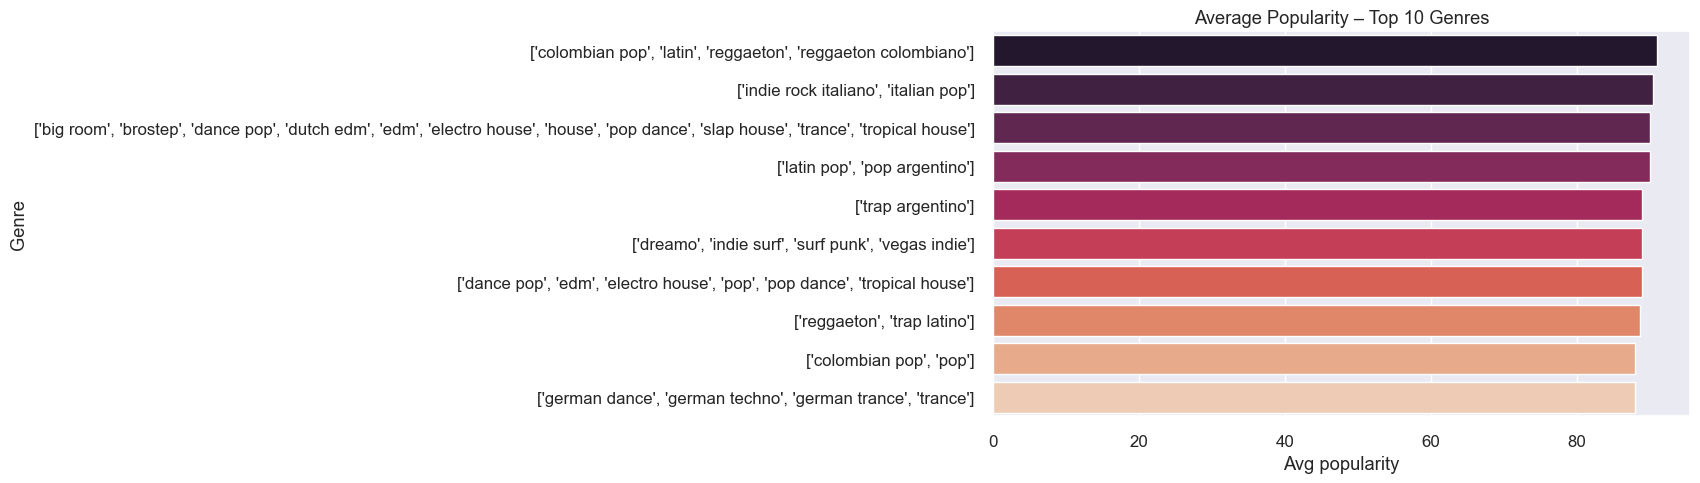

In [12]:
pop_by_genre = (df.groupby("Genre")["Popularity"]
                  .mean().sort_values(ascending=False).head(10))
plt.figure(figsize=(9,5))
sns.barplot(x=pop_by_genre.values, y=pop_by_genre.index, palette="rocket")
plt.title("Average Popularity – Top 10 Genres")
plt.xlabel("Avg popularity"); plt.ylabel("Genre")
plt.tight_layout(); plt.show()


C:\Users\Nandini\AppData\Local\Temp\ipykernel_17444\3842463171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette="crest")


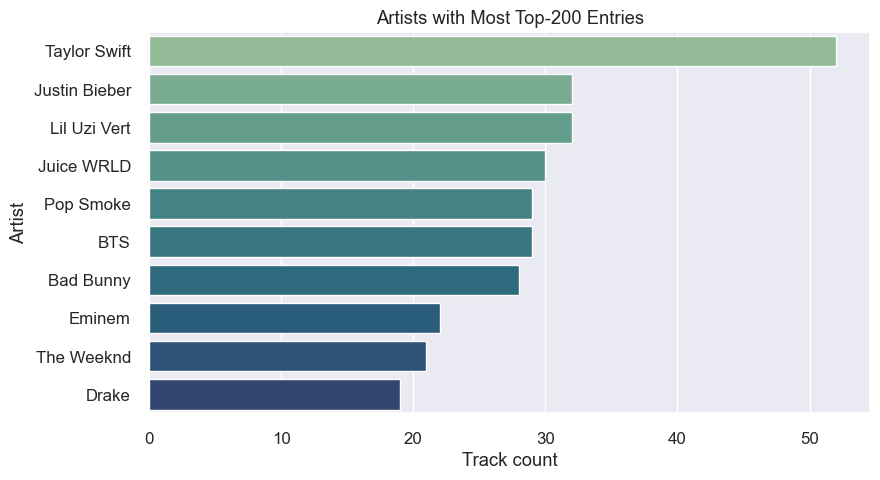

In [13]:
top_artists = df["Artist"].value_counts().head(10)
plt.figure(figsize=(9,5))
sns.barplot(y=top_artists.index, x=top_artists.values, palette="crest")
plt.title("Artists with Most Top-200 Entries")
plt.xlabel("Track count"); plt.ylabel("Artist")
plt.tight_layout(); plt.show()


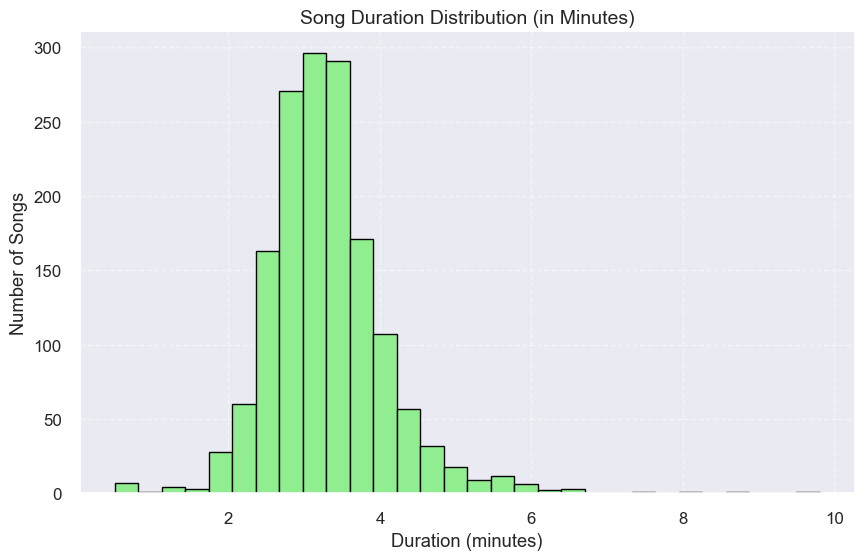

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df["Duration (ms)"] / 60000, bins=30, color='lightgreen', edgecolor='black')
plt.title("Song Duration Distribution (in Minutes)", fontsize=14)
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Songs")
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig("Song_duration_distribution.png", dpi=300, bbox_inches='tight')
plt.show()



## Conclusions  
* **Pop & hip-hop** dominate by volume; **EDM** posts slightly higher average popularity.  
* High **danceability**, **energy**, and **positive valence** are the winning sonic combo.  
* Popularity is highly skewed; only a tiny fraction of songs cross the 90+ threshold.  